# Exploratory Data Analysis

In [134]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
sns.set(style="whitegrid")
df = pd.read_csv("../data/processed/model_dataset.csv")

In [136]:
# Check for statistical information
df.info
df.tail(50)

,customer_id,signup_date,age,province,segment,acquisition_channel,plan_type,contract_type,price_per_month,status,...,days_late_max,failed_payment_sum,amount_paid_mean,ticket_count,avg_satisfaction_score,avg_resolution_time_hours,cancelled,no_usage_2mo,failed_payments_3mo,churn
9950,9951,2020-06-01,38,MB,Enterprise,Sales Team,Basic,Annual,20,Active,...,10,2,18.333333,NaN,NaN,NaN,0,0,0,0
9951,9952,2020-08-15,19,NB,Individual,Sales Team,Premium,Monthly,70,Active,...,11,0,70.000000,2.0,2.500000,23.596822,0,0,0,0
9952,9953,2021-10-23,71,SK,Small Business,Organic,Basic,Annual,20,Active,...,6,2,18.333333,1.0,1.000000,40.426002,0,0,0,0
9953,9954,2021-10-02,44,SK,Small Business,Paid Ads,Premium,Monthly,70,Active,...,6,1,67.083333,NaN,NaN,NaN,0,0,0,0
9954,9955,2020-05-07,55,QC,Enterprise,Organic,Standard,Monthly,40,Active,...,7,2,36.666667,NaN,NaN,NaN,0,0,0,0
9955,9956,2020-05-23,43,AB,Enterprise,Organic,Premium,Monthly,70,Active,...,8,0,70.000000,NaN,NaN,NaN,0,0,0,0
9956,9957,2020-04-06,55,QC,Small Business,Organic,Premium,Monthly,70,Active,...,10,0,70.000000,2.0,4.500000,27.673101,0,0,0,0
9957,9958,2021-10-22,63,MB,Individual,Paid Ads,Premium,Monthly,70,Active,...,5,5,55.416667,3.0,2.333333,27.355452,0,0,0,0
9958,9959,2020-07-21,42,NB,Enterprise,Sales Team,Basic,Monthly,20,Active,...,10,2,18.333333,3.0,1.666667,31.111249,0,0,0,0
9959,9960,2022-01-09,28,ON,Enterprise,Organic,Standard,Annual,40,Active,...,7,2,36.666667,NaN,NaN,NaN,0,0,0,0


In [158]:
df["churn"].value_counts(normalize=True)


churn
0    0.9938
1    0.0062
Name: proportion, dtype: float64

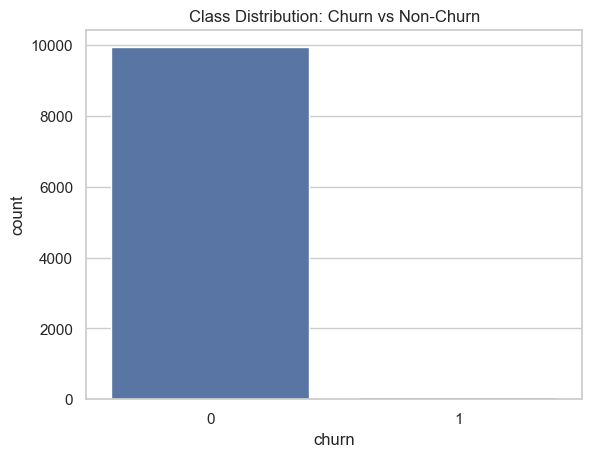

In [161]:
sns.countplot(x="churn", data=df)
plt.title("Class Distribution: Churn vs Non-Churn")
plt.show()


In [138]:
# Categorical Feature Analysis- Segment vs Churn
pd.crosstab(df["segment"],df["churn"], normalize="index")

churn,0,1
segment,,
Enterprise,0.992147,0.007853
Individual,0.994689,0.005311
Small Business,0.994545,0.005455


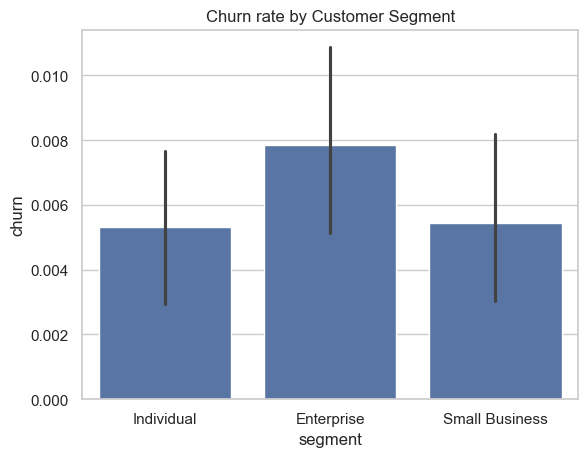

In [139]:
# Visualize
sns.barplot(
    x = "segment",
    y = "churn",
    data = df,
    estimator = np.mean
)
plt.title("Churn rate by Customer Segment")
plt.show()

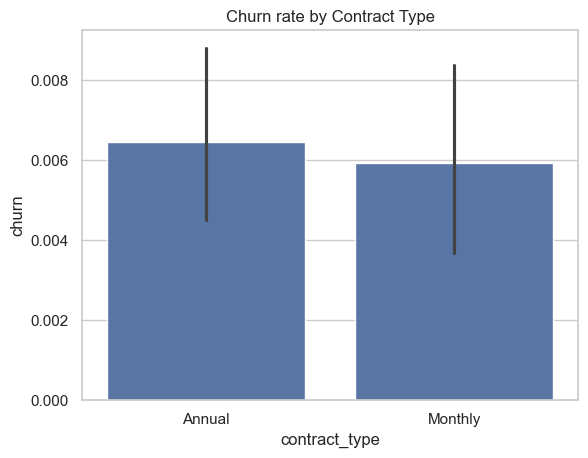

In [140]:
# Let's compare contract type vs churn rate
sns.barplot(
    x = "contract_type",
    y = "churn",
    data = df)
plt.title("Churn rate by Contract Type")
plt.show()

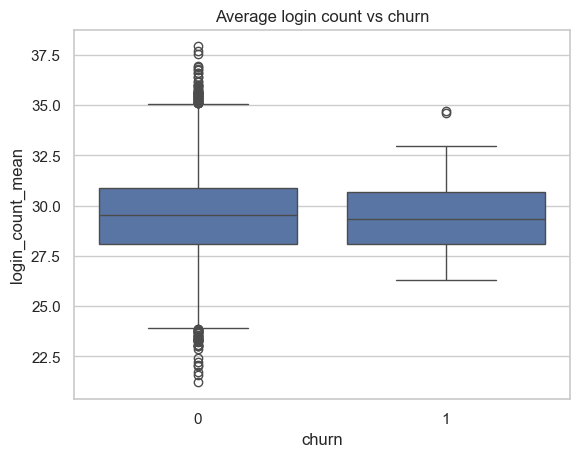

In [141]:
# User behaviour vs Churn (Core insight)
sns.boxplot(
    x = "churn",
    y = "login_count_mean",
    data = df
)
plt.title("Average login count vs churn")
plt.show()

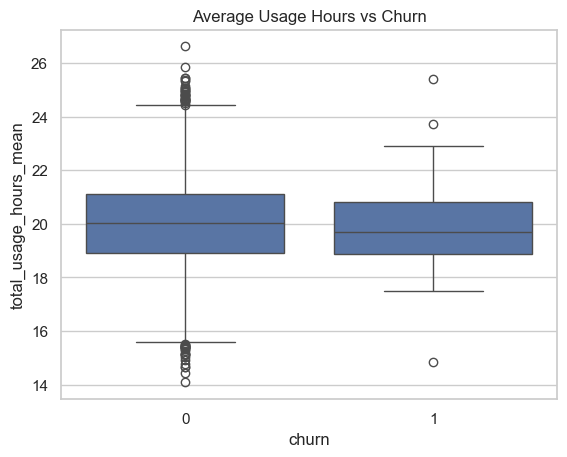

In [142]:
# Let's see the distribution of age vs churn
sns.boxplot(
    x="churn",
    y="total_usage_hours_mean",
    data=df
)
plt.title("Average Usage Hours vs Churn")
plt.show()


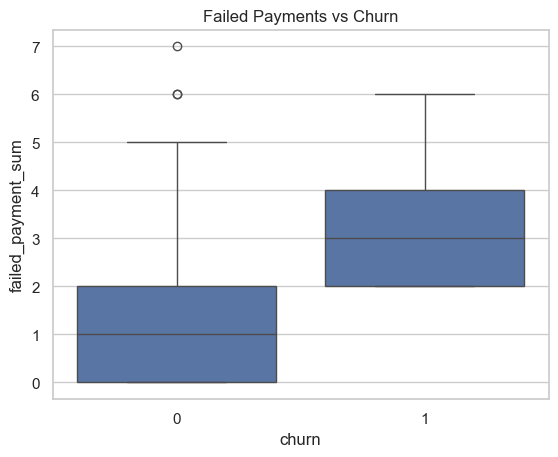

In [143]:
# Billing and Support Signals
sns.boxplot(
    x="churn",
    y="failed_payment_sum",
    data=df
)
plt.title("Failed Payments vs Churn")
plt.show()


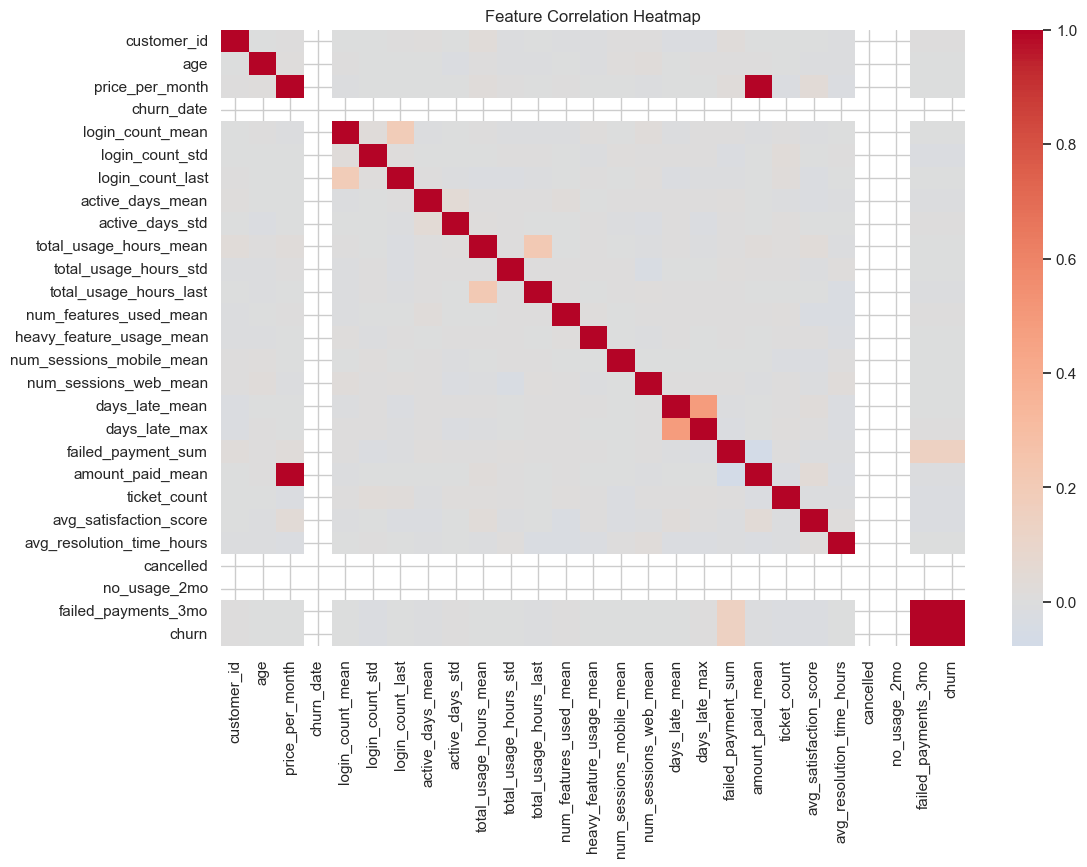

In [144]:
# Correlation Check
num_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(12, 8))
sns.heatmap(
    df[num_cols].corr(),
    cmap="coolwarm",
    center=0
)
plt.title("Feature Correlation Heatmap")
plt.show()


## Figuring out engagement drivers

### Average logins vs churn

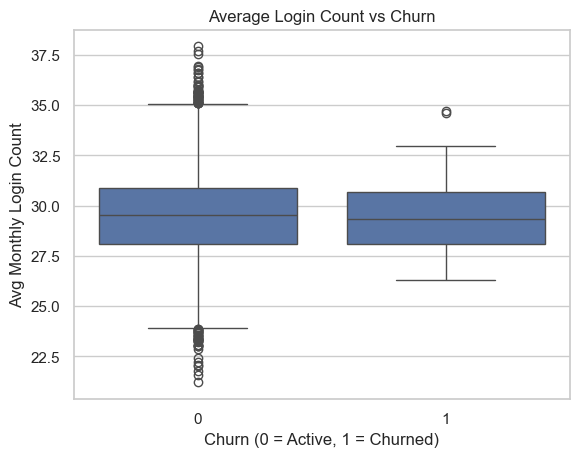

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(
    x="churn",
    y="login_count_mean",
    data=df
)
plt.title("Average Login Count vs Churn")
plt.xlabel("Churn (0 = Active, 1 = Churned)")
plt.ylabel("Avg Monthly Login Count")
plt.show()


### Usage hours vs churn

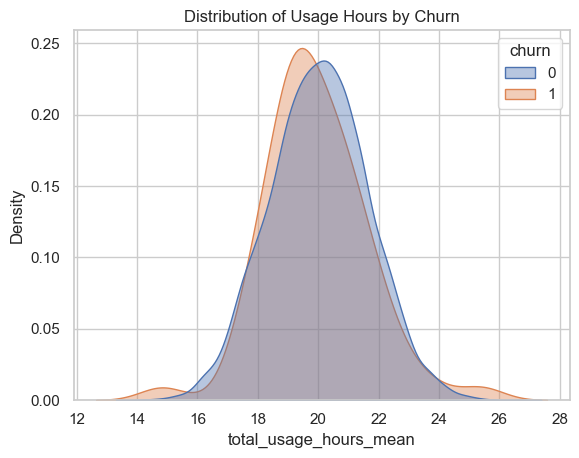

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(
    data=df,
    x="total_usage_hours_mean",
    hue="churn",
    common_norm=False,
    fill=True,
    alpha=0.4
)
plt.title("Distribution of Usage Hours by Churn")
plt.show()



## Billing Drivers

### Failed Payments

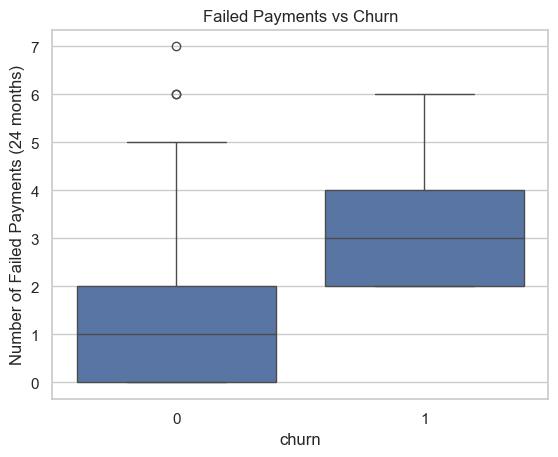

In [147]:
sns.boxplot(
    x="churn",
    y="failed_payment_sum",
    data=df
)
plt.title("Failed Payments vs Churn")
plt.ylabel("Number of Failed Payments (24 months)")
plt.show()


### Days late on Payments

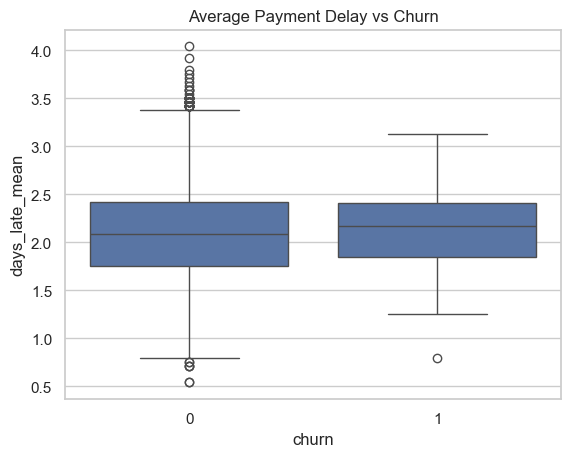

In [148]:
sns.boxplot(
    x="churn",
    y="days_late_mean",
    data=df
)
plt.title("Average Payment Delay vs Churn")
plt.show()

## Support Friction

### Number of Support Tickets

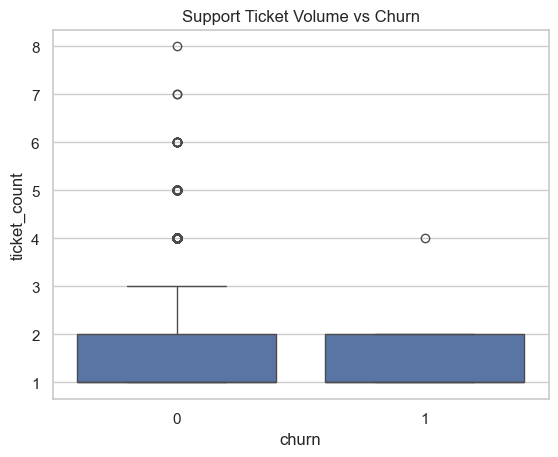

In [149]:

sns.boxplot(
    x = "churn",
    y = "ticket_count",
    data = df
)
plt.title("Support Ticket Volume vs Churn")
plt.show()

### Satisfaction score

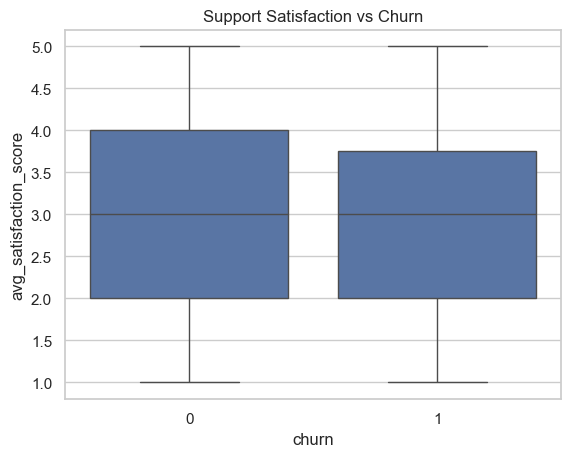

In [150]:
sns.boxplot(
    x="churn",
    y="avg_satisfaction_score",
    data=df
)
plt.title("Support Satisfaction vs Churn")
plt.show()


## Contract and Customer Characteristics

### Contract type

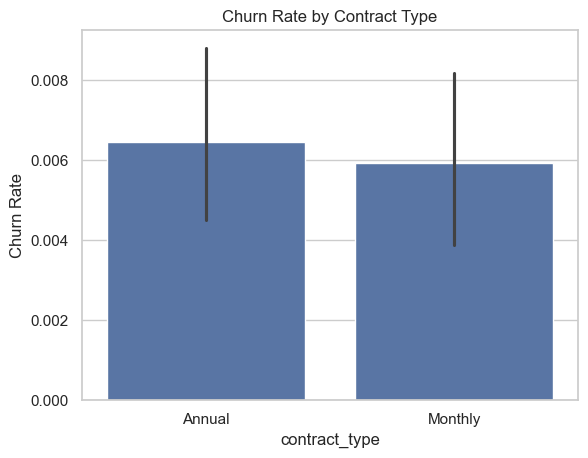

In [151]:
sns.barplot(
    x="contract_type",
    y="churn",
    data=df,
    estimator=lambda x: sum(x) / len(x)
)
plt.title("Churn Rate by Contract Type")
plt.ylabel("Churn Rate")
plt.show()


### Customer Segment

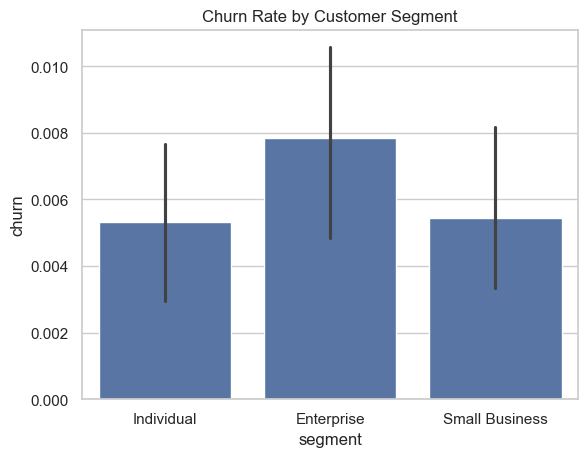

In [152]:
sns.barplot(
    x="segment",
    y="churn",
    data=df
)
plt.title("Churn Rate by Customer Segment")
plt.show()


## interraction between engagement and billing

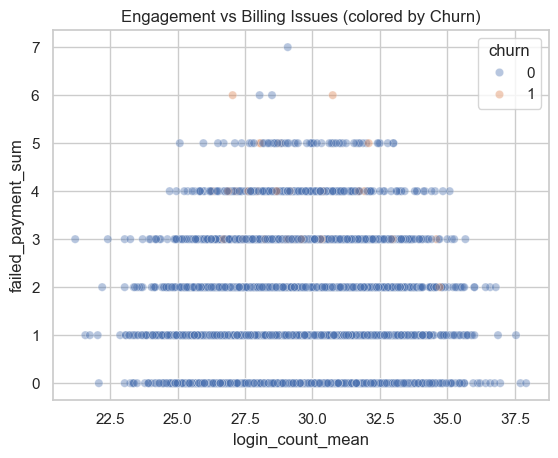

In [153]:
sns.scatterplot(
    x = "login_count_mean",
    y = "failed_payment_sum",
    hue = "churn",
    data = df,
    alpha = 0.4
)
plt.title("Engagement vs Billing Issues (colored by Churn)")
plt.show()


## Quick ranking of numeric churn drivers

In [154]:
numeric_cols = df.select_dtypes(include="number").columns
numeric_cols = numeric_cols.drop("churn")

churn_diff = (
    df.groupby("churn")[numeric_cols]
    .mean()
    .T
)

churn_diff["abs_diff"] = abs(churn_diff[1] - churn_diff[0])
churn_diff.sort_values("abs_diff", ascending=False).head(10)


churn,0,1,abs_diff
customer_id,4998.672067,5293.500000,294.827933
amount_paid_mean,40.978651,37.869624,3.109027
failed_payment_sum,1.180016,3.177419,1.997403
total_usage_hours_last,19.958175,18.586741,1.371434
age,46.172369,45.161290,1.011078
failed_payments_3mo,0.000000,1.000000,1.000000
price_per_month,43.118334,43.870968,0.752634
login_count_last,29.581606,29.983871,0.402265
login_count_std,10.342596,9.981069,0.361528
avg_satisfaction_score,3.012778,2.717949,0.294829


## How does Churn probability change as a feature increases?

C:\Users\akink\AppData\Local\Temp\ipykernel_15084\3320809094.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_usage = df.groupby(usage_bins)["churn"].mean()


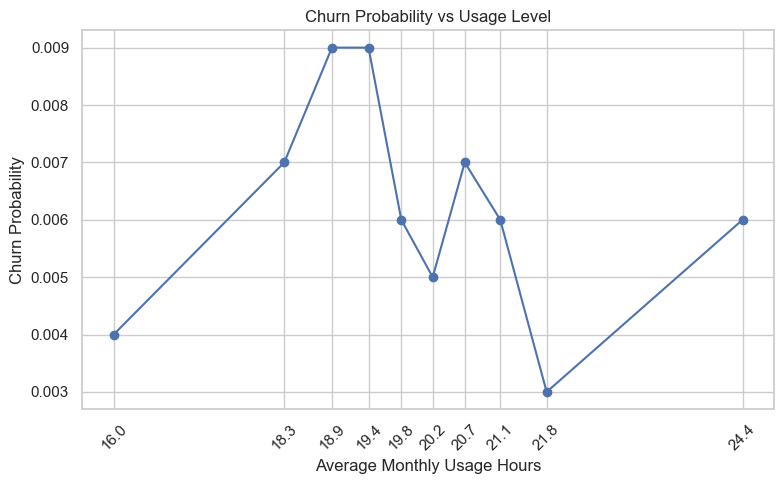

In [157]:
import pandas as pd
import matplotlib.pyplot as plt

# Create usage deciles
usage_bins = pd.qcut(
    df["total_usage_hours_mean"],
    q=10,
    duplicates="drop"
)

# Compute churn probability per decile
churn_by_usage = df.groupby(usage_bins)["churn"].mean()

# Compute numeric midpoints for each bin
bin_midpoints = [
    (interval.left + interval.right) / 2
    for interval in churn_by_usage.index
]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(
    bin_midpoints,
    churn_by_usage.values,
    marker="o"
)

plt.xlabel("Average Monthly Usage Hours")
plt.ylabel("Churn Probability")
plt.title("Churn Probability vs Usage Level")

# Format x-axis to 1 decimal place
plt.xticks(
    ticks=bin_midpoints,
    labels=[f"{x:.1f}" for x in bin_midpoints],
    rotation=45
)

plt.grid(True)
plt.tight_layout()
plt.show()
